In [ ]:
RANDOM_STATE = 1234

In [ ]:
# CARGA DEL DATASET
# Voy a usar el mismo dataset de emociones que utilicé para la actividad anterior

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/EALC/"

emotion_file = path + "emotion.csv"

df = pd.read_csv(emotion_file)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [ ]:
# realizo el mismo proceso de normalización que en la actividad anterior

# PREPROCESAMIENTO DEL DATASET
import re
import nltk
from nltk.corpus import stopwords

wpt = nltk.WordPunctTokenizer()
nltk.download('stopwords') # añadido
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

# Crear una nueva columna 'review_normalized' en el DataFrame
df['comment_normalized'] = df['Comment'].apply(normalize_document)

# Verificar el DataFrame resultante
df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Comment,Emotion,comment_normalized
0,i seriously hate one subject to death but now ...,fear,seriously hate one subject death feel reluctan...
1,im so full of life i feel appalled,anger,im full life feel appalled
2,i sit here to write i start to dig out my feel...,fear,sit write start dig feelings think afraid acce...
3,ive been really angry with r and i feel like a...,joy,ive really angry r feel like idiot trusting fi...
4,i feel suspicious if there is no one outside l...,fear,feel suspicious one outside like rapture happe...
5,i feel jealous becasue i wanted that kind of l...,anger,feel jealous becasue wanted kind love true con...
6,when a friend of mine keeps telling me morbid ...,anger,friend mine keeps telling morbid things happen...
7,i finally fell asleep feeling angry useless an...,anger,finally fell asleep feeling angry useless stil...
8,i feel a bit annoyed and antsy in a good way,anger,feel bit annoyed antsy good way
9,i feel like i ve regained another vital part o...,joy,feel like regained another vital part life living


In [ ]:
import keras
keras.__version__

'2.15.0'

## **Redes recurrentes simples**

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

# en la actividad anterior obtuve las palabras de media de cada texto (19)

max_features = 1000
maxlen = 19

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['comment_normalized'])

input_data = tokenizer.texts_to_sequences(df['comment_normalized'])
input_data = pad_sequences(input_data, maxlen=maxlen)

labels = df['Emotion'].values

from sklearn.model_selection import train_test_split

input_train, input_test, y_train, y_test = train_test_split(input_data, labels, test_size=0.2, random_state= RANDOM_STATE)

In [ ]:
print("Training texts:", len(y_train))
print("Val texts:", len(y_test))
print("Training texts:", len(input_train))
print("Training texts:", len(input_test))

Training texts: 4749
Val texts: 1188
Training texts: 4749
Training texts: 1188


In [ ]:
# convertimos las clases (y) en one-hot
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()

y_train_numeric = label_encoder.fit_transform(y_train)
y_test_numeric = label_encoder.transform(y_test)

y_train_one_hot = to_categorical(y_train_numeric, num_classes=3)
y_test_one_hot = to_categorical(y_test_numeric, num_classes=3)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(max_features, 50, input_length=maxlen))
model.add(SimpleRNN(32))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(input_train, y_train_one_hot, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/10
60/60 [==============================] - 2s 13ms/step - loss: 1.0701 - accuracy: 0.4493 - val_loss: 1.0137 - val_accuracy: 0.6053
Epoch 2/10
60/60 [==============================] - 1s 8ms/step - loss: 0.7852 - accuracy: 0.7665 - val_loss: 0.7478 - val_accuracy: 0.6179
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 0.4346 - accuracy: 0.8968 - val_loss: 0.4172 - val_accuracy: 0.8874
Epoch 4/10
60/60 [==============================] - 0s 8ms/step - loss: 0.2332 - accuracy: 0.9495 - val_loss: 0.2968 - val_accuracy: 0.9116
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.1519 - accuracy: 0.9595 - val_loss: 0.2616 - val_accuracy: 0.9168
Epoch 6/10
60/60 [==============================] - 0s 8ms/step - loss: 0.1003 - accuracy: 0.9692 - val_loss: 0.2213 - val_accuracy: 0.9189
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0862 - accuracy: 0.9726 - val_loss: 0.2284 - val_accuracy: 0.9232
Epoch 8/10
60/60 [=

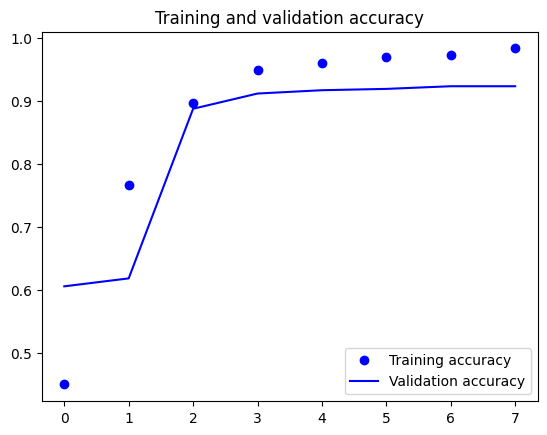

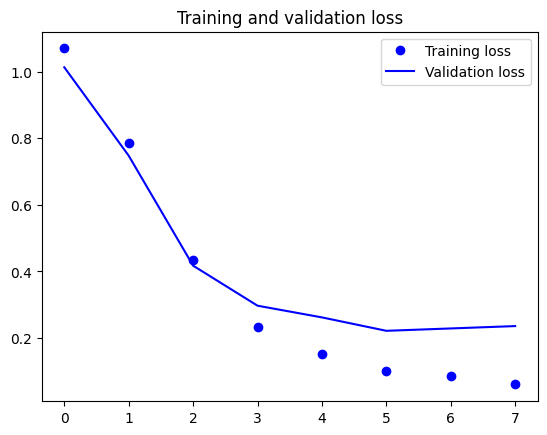

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
score1 = model.evaluate(input_test, y_test_one_hot)

print("Accuracy: %.2f%%" % (score1[1]*100))

38/38 [==============================] - 0s 3ms/step - loss: 0.2273 - accuracy: 0.9234
Accuracy: 92.34%


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Usar LabelEncoder para asignar un número único a cada clase
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

y_pred_probs = model.predict(input_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test_encoded, y_pred)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(cm)

38/38 [==============================] - 0s 2ms/step
Matriz de Confusión:
[[401  14  13]
 [ 20 339   4]
 [ 28  12 357]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       428
           1       0.93      0.93      0.93       363
           2       0.95      0.90      0.93       397

    accuracy                           0.92      1188
   macro avg       0.93      0.92      0.92      1188
weighted avg       0.92      0.92      0.92      1188



In [ ]:
import seaborn as sns
import pandas as pd

def plot_confusion_matrix(y, y_preds):

    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_preds)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)
    # Añadir etiquetas y título
    plt.title('Matriz de Confusión Modelo 1')
    plt.xlabel('Predicciones')
    plt.ylabel('Etiquetas Verdaderas')

    # Mostrar el gráfico
    plt.show()

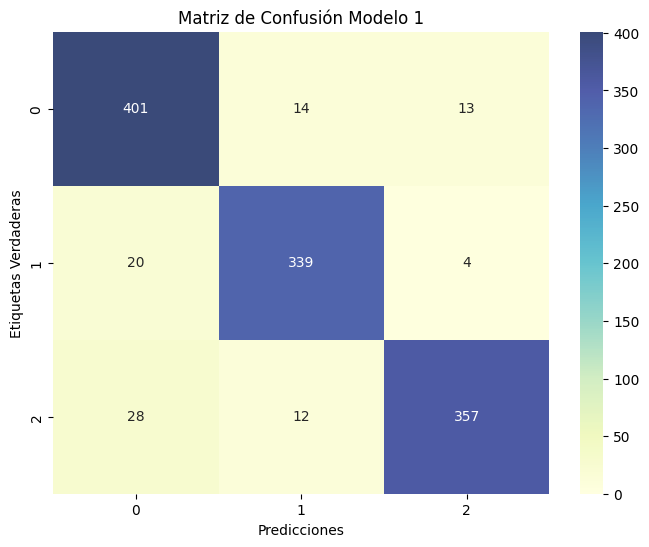

In [ ]:
# Añadir etiquetas y título

plot_confusion_matrix(y_test_encoded, y_pred)

## **Red recurrente usando LSTM**

In [ ]:
from keras.layers import LSTM
from keras.callbacks import EarlyStopping

model2 = Sequential()
model2.add(Embedding(max_features, 32))
model2.add(LSTM(32))
model2.add(Dense(3, activation='softmax'))

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history2 = model2.fit(input_train, y_train_one_hot, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
60/60 [==============================] - 5s 34ms/step - loss: 1.0927 - accuracy: 0.4204 - val_loss: 1.0805 - val_accuracy: 0.6063
Epoch 2/50
60/60 [==============================] - 1s 20ms/step - loss: 1.0275 - accuracy: 0.6202 - val_loss: 0.9601 - val_accuracy: 0.6758
Epoch 3/50
60/60 [==============================] - 1s 12ms/step - loss: 0.8303 - accuracy: 0.7607 - val_loss: 0.7500 - val_accuracy: 0.7695
Epoch 4/50
60/60 [==============================] - 1s 12ms/step - loss: 0.5560 - accuracy: 0.8731 - val_loss: 0.5083 - val_accuracy: 0.8789
Epoch 5/50
60/60 [==============================] - 1s 13ms/step - loss: 0.3423 - accuracy: 0.9247 - val_loss: 0.3533 - val_accuracy: 0.9126
Epoch 6/50
60/60 [==============================] - 1s 13ms/step - loss: 0.2167 - accuracy: 0.9460 - val_loss: 0.2996 - val_accuracy: 0.9126
Epoch 7/50
60/60 [==============================] - 1s 12ms/step - loss: 0.1461 - accuracy: 0.9613 - val_loss: 0.2278 - val_accuracy: 0.9253
Epoch 8/50
60

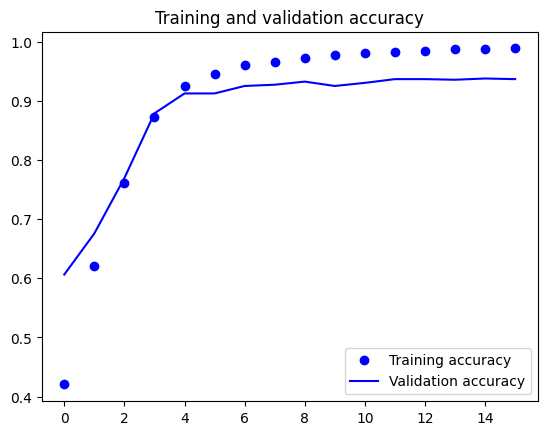

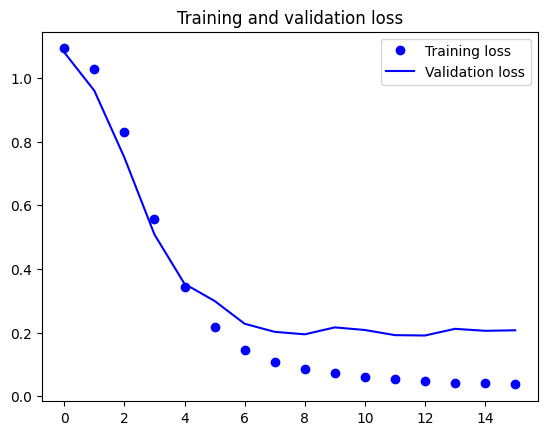

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
score2 = model2.evaluate(input_test, y_test_one_hot)

print("Accuracy: %.2f%%" % (score2[1]*100))

38/38 [==============================] - 0s 5ms/step - loss: 0.2335 - accuracy: 0.9285
Accuracy: 92.85%


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Usar LabelEncoder para asignar un número único a cada clase
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

y_pred_probs = model2.predict(input_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test_encoded, y_pred)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(cm)

38/38 [==============================] - 1s 5ms/step
Matriz de Confusión:
[[394  17  17]
 [ 21 336   6]
 [ 16   8 373]]


In [ ]:
import seaborn as sns
import pandas as pd

def plot_confusion_matrix(y, y_preds):

    plt.figure(figsize=(8, 6))
    plt.title('Matriz de Confusión')
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_preds)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)
    # Añadir etiquetas y título
    plt.title('Matriz de Confusión Modelo 2')
    plt.xlabel('Predicciones')
    plt.ylabel('Etiquetas Verdaderas')

    # Mostrar el gráfico
    plt.show()

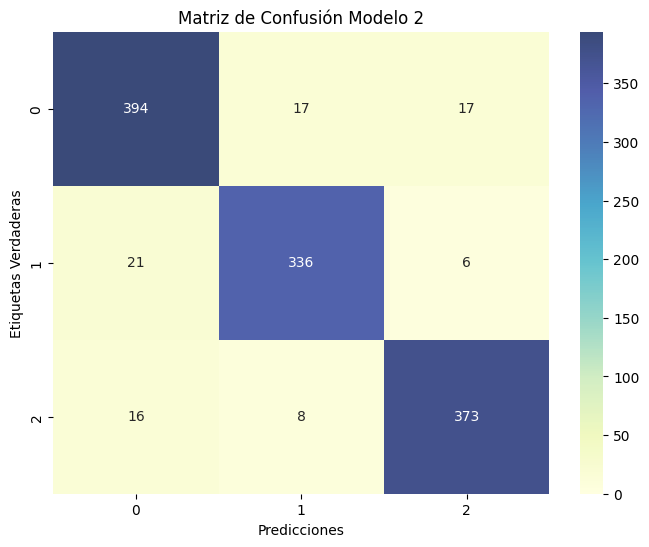

In [ ]:
# Añadir etiquetas y título

plot_confusion_matrix(y_test_encoded, y_pred)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       428
           1       0.93      0.93      0.93       363
           2       0.94      0.94      0.94       397

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188



## **Red recurrente bidireccional**


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, SimpleRNN, Dense
from keras.callbacks import EarlyStopping

model3 = Sequential()
model3.add(Embedding(max_features, 32))
model3.add(Bidirectional(SimpleRNN(32)))
model3.add(Dense(3, activation='softmax'))

model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history3 = model3.fit(input_train, y_train_one_hot, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

score3 = model3.evaluate(input_test, y_test_one_hot)

print("Accuracy: %.2f%%" % (score3[1]*100))

Epoch 1/50
60/60 [==============================] - 4s 16ms/step - loss: 1.0276 - accuracy: 0.4522 - val_loss: 0.8361 - val_accuracy: 0.6295
Epoch 2/50
60/60 [==============================] - 1s 10ms/step - loss: 0.5565 - accuracy: 0.8063 - val_loss: 0.5314 - val_accuracy: 0.8084
Epoch 3/50
60/60 [==============================] - 1s 10ms/step - loss: 0.3059 - accuracy: 0.9023 - val_loss: 0.4936 - val_accuracy: 0.8274
Epoch 4/50
60/60 [==============================] - 1s 11ms/step - loss: 0.1903 - accuracy: 0.9421 - val_loss: 0.3204 - val_accuracy: 0.8916
Epoch 5/50
60/60 [==============================] - 1s 11ms/step - loss: 0.1402 - accuracy: 0.9566 - val_loss: 0.3793 - val_accuracy: 0.8789
Epoch 6/50
60/60 [==============================] - 1s 11ms/step - loss: 0.1083 - accuracy: 0.9650 - val_loss: 0.3000 - val_accuracy: 0.9063
Epoch 7/50
60/60 [==============================] - 1s 10ms/step - loss: 0.0846 - accuracy: 0.9695 - val_loss: 0.3162 - val_accuracy: 0.8937
Epoch 8/50
38

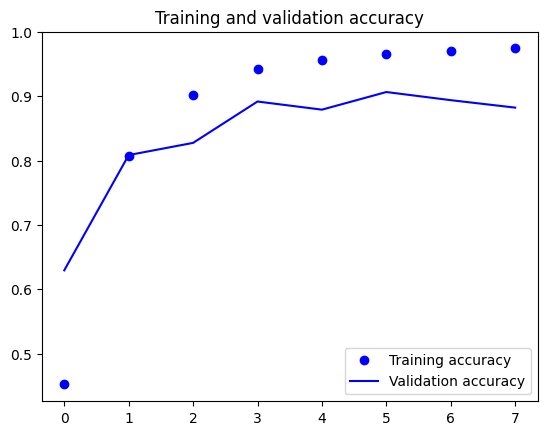

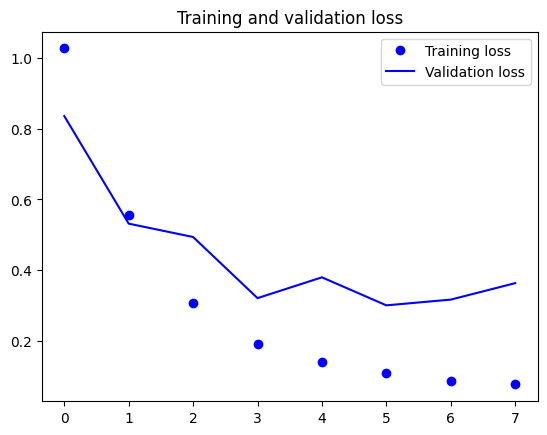

In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
y_pred_probs = model3.predict(input_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test_encoded, y_pred)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(cm)

38/38 [==============================] - 1s 5ms/step
Matriz de Confusión:
[[384  21  23]
 [ 21 330  12]
 [ 23  18 356]]


In [ ]:
def plot_confusion_matrix(y, y_preds):

    plt.figure(figsize=(8, 6))
    plt.title('Matriz de Confusión')
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_preds)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)
    # Añadir etiquetas y título
    plt.title('Matriz de Confusión Modelo 3')
    plt.xlabel('Predicciones')
    plt.ylabel('Etiquetas Verdaderas')

    # Mostrar el gráfico
    plt.show()

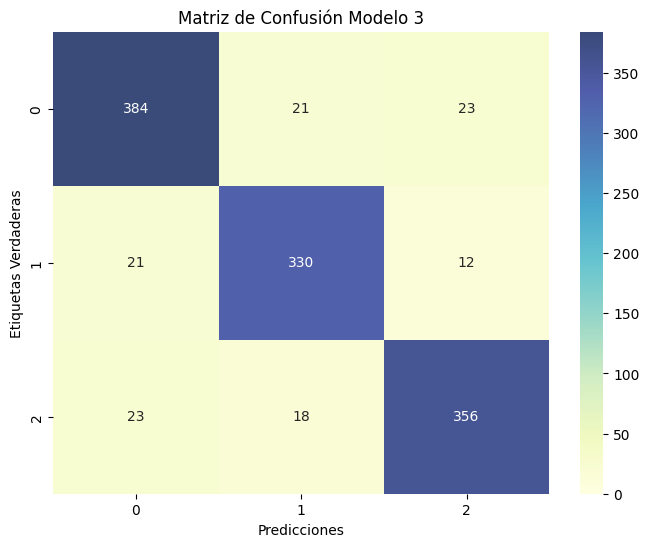

In [ ]:
# Añadir etiquetas y título

plot_confusion_matrix(y_test_encoded, y_pred)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       428
           1       0.89      0.91      0.90       363
           2       0.91      0.90      0.90       397

    accuracy                           0.90      1188
   macro avg       0.90      0.90      0.90      1188
weighted avg       0.90      0.90      0.90      1188



## **Conclusiones**

La RNN que peores resultados de accuracy (90.07%) , precision (90%), recall (90%) y F1 (90%) ha obtenido es la bidireccional. Teniendo en cuenta la naturaleza de mi dataset, donde la secuencia más larga de texto tiene 19 tokens, entendemos que quizás una RNN bidireccional no sea la más adecuada para esta tarea. Las RNN bidireccionales  son más complejas que las RNN simples o las LSTM debido a su capacidad para procesar la secuencia en ambas direcciones. Esto puede hacer que el entrenamiento sea más difícil y requiera más datos para converger. Como tenemos un conjunto de datos pequeño, la RNN bidireccionalno aprende de manera tan efectiva como en los otros modelos. Además, puede acarrear problemas de sobreajuste ya que nuestro dataset no es excesivamente grande. De todas maneras, esto no quiere decir que haya creado un modelo que no funciona correctamente, con un porcentaje de 90% en casi todos los parámetros de validación, se puede decir que es un modelo que funciona bastante bien.

Por otro lado, la RNN simple y la RNN con LSTM tienen porcentajes muy parecidos:


*   RNN simple: accuracy 92.34%, precision 92%, recall 92%, F1 92%
*   LSTM: accuracy: 92.85%, precision 93%, recall 93%, F1 93%

Puede haber varios motivos por los que las RNN con LSTM funcionan mejor: evitan el problema de desvanecimiento del gradiente, gracias a su arquitectura, las LSTM pueden mantener un flujo constante de información a lo largo de las secuencias sin que los gradientes se desvanezcan o exploten fácilmente. Además, tienen un aprendizaje de representaciones más ricas y abstractas de los datos, lo que puede ser beneficioso para problemas complejos. Pueden adaptarse mejor a patrones sutiles y relaciones no lineales en los datos. También la estructura de las LSTM proporciona cierta forma de regularización automática al aprender qué información es relevante y cuándo actualizar o olvidar la memoria. Esto puede ayudar a prevenir el sobreajuste en conjuntos de datos pequeños.

Finalmente, quiero analizar brevemente los resultados de evaluación de la RNN con LSTM:


*   Accuracy: la precisión global del modelo es del 92.85%. Lo que quiere decir que el modelo ha clasificado incorrectamente menos del 8% de los datos del conjunto de prueba.
*   Precision: la precision global con el  promedio ponderado según el número de instancias en cada clase es del 93%. Para la clase 0 (anger) es del 91%, para las clase 1 (fear) y 2 (joy) es del 93%.
*   Recall: la precisión global de los peso ponderados también es del 93%. Para la clase 0 es del 92%, para la 1 93% y para la 2 94%.
*   F1-score: la precisión global de los peso ponderados también es del 93%. Para la clase 0 es del 92%, para la clase 1 93% y para la clase 2 94%.
*   Matriz de confusión:
  *  Clase 0 (anger): el total de verdaderos positivos es de 394, los falsos positivos sería la suma de la primera columna (sin contar los TP), es decir, los valores que el modelo ha predicho como positivos (anger) pero que en realidad no lo son, son 37. Los falsos negativos por el contrario, los valores que el modelo no ha clasificado como positivos pero que sí lo son, es la suma de la primera fila (sin contar los TP): 34.
  *  Clase 1 (fear): el total de verdaderos positivos es de 336, los falsos positivos son 25 y los falsos negativos 27.
  *  Clase 2 (joy): el total de verdaderos positivos es de 373, los falsos positivos son 23 y los falsos negativos 24.

En resumen, hemos conseguido unos valores de evaluación muy elevados y podemos decir que los tres modelos son muy válidos para esta tarea de clasificación multiclase.  















